In [94]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

## 6.1
### a

데이터마이닝은 '새로운'데이터에 대한 예측을 하는 것이기 떄문이다. 학습세트로 모델을 학습시키고, 학습시키지 않은 검증데이터로 예측성능을 평가한다. 

In [4]:
boston_df = pd.read_csv("BostonHousing.csv")

In [5]:
# 예측, 반응 변수 설정
predictors = ['CRIM','CHAS','RM']
outcome = 'MEDV'

x = boston_df[predictors]
y = boston_df[outcome]

In [6]:
# 데이터셋 나누기
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.4, random_state=1)

In [7]:
mod = LinearRegression()
mod.fit(train_x, train_y)

LinearRegression()

### b

In [43]:
mod.predict(x)

array([25.54304295, 24.25592705, 30.61636578, 29.05833848, 30.28998412,
       24.33024387, 20.83629136, 22.15481351, 17.63488393, 20.75006488,
       23.84218785, 20.80431082, 19.81097686, 20.18181885, 21.40365111,
       19.22499264, 19.96343922, 20.48607583, 16.03598867, 18.31057436,
       16.87725153, 20.26166063, 21.6438898 , 18.96349191, 19.94476197,
       17.21740719, 19.03947639, 20.91942336, 24.69298046, 26.12810217,
       18.09679432, 21.03177993, 20.00812168, 17.99187252, 21.16962409,
       20.18439282, 19.41048982, 19.48956947, 20.43250551, 25.70443073,
       29.27450017, 27.1373758 , 22.13057018, 22.47594003, 21.30256822,
       18.06902715, 18.93077872, 20.95230055, 15.69320941, 17.39140612,
       20.42825215, 21.70456801, 24.99888159, 20.7289765 , 19.82189987,
       31.15258108, 23.94119321, 27.5474897 , 21.92765716, 20.12505293,
       18.56551786, 20.43330731, 24.52739263, 27.07100006, 29.94389427,
       23.16328136, 18.97380969, 19.72801576, 17.34502515, 19.76

### c

In [34]:
x_ = x.copy()
x_

,CRIM,CHAS,RM
0,0.00632,0,6.575
1,0.02731,0,6.421
2,0.02729,0,7.185
3,0.03237,0,6.998
4,0.06905,0,7.147
...,...,...,...
501,0.06263,0,6.593
502,0.04527,0,6.120
503,0.06076,0,6.976
504,0.10959,0,6.794


In [37]:
x_ = x_[x_['CHAS']==0]
x_[x_['CRIM']==0.1]

# 303

,CRIM,CHAS,RM
303,0.1,0,6.982


In [45]:
# 예측값
mod.predict(x)[303]

28.908900274080697

In [47]:
# 예측오차
y[303] - mod.predict(x)[303]

4.191099725919305

### d

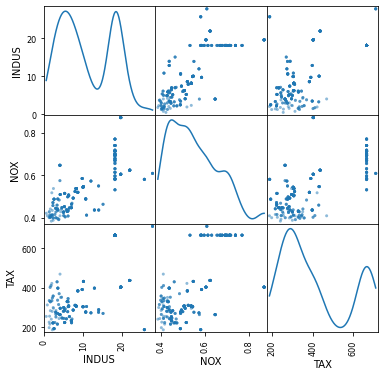

In [54]:
# i 
from pandas.plotting import scatter_matrix, parallel_coordinates
df = boston_df[['INDUS','NOX','TAX']]
axes = scatter_matrix(df, alpha = 0.5, figsize = (6,6), diagonal='kde')

'INDUS','NOX','TAX'의 산점도 행렬을 보면 산점도의 형태가 다 비슷하고 x,y축을 바뀌었을 때도 1:1대응되는 형태를 띄우고 있다. 이들은 동일한 것을 측정하는 것 같다.

In [81]:
# ii
df = boston_df.drop(labels = ['MEDV','CAT. MEDV'], axis = 1)
boston_corr = df.corr().round(2)
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54


INDUS-NOX (0.76)
INDUS-TAX (0.72)
NOX-DIS (-0.77)
DIS-AGE (-0.85)
RAD-TAX (0.91)

INDUS, NOX, TAX, DIS를 삭제한다.

1. n = 3,4,5 일 때의 모델 (score가 가장 높은 셋)

In [89]:
# backward

def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

allVariables = train_x.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose = True)
print(best_variables)

Variables: CRIM, ZN, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=1841.43
Step: score=1839.93, remove AGE
Step: score=1838.87, remove RAD
Step: score=1837.71, remove ZN
Step: score=1837.69, remove CRIM
Step: score=1837.69, remove None
['CHAS', 'RM', 'PTRATIO', 'LSTAT']


In [90]:
# forward

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: CRIM, ZN, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1837.69, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS']


In [91]:
# stepwise

best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: CRIM, ZN, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1837.69, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS']


In [5]:
predictors = ['LSTAT', 'RM', 'PTRATIO', 'CHAS']
outcome = 'MEDV'
x = boston_df[predictors]
y = boston_df[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.4, random_state=1)
mod = LinearRegression()
mod.fit(train_x, train_y)

regressionSummary(valid_y, mod.predict(valid_x))



Regression statistics

                      Mean Error (ME) : 0.1274
       Root Mean Squared Error (RMSE) : 5.4654
            Mean Absolute Error (MAE) : 3.9211
          Mean Percentage Error (MPE) : -4.8675
Mean Absolute Percentage Error (MAPE) : 18.6416


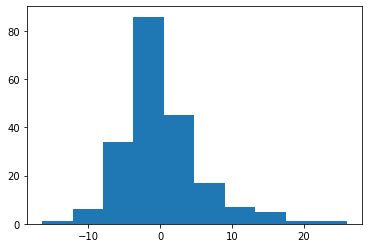

In [7]:
plt.hist(valid_y-mod.predict(valid_x))
plt.show()

### 6.2

In [4]:
tayco = pd.read_csv("Tayko.csv")
tayco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sequence_number       2000 non-null   int64
 1   US                    2000 non-null   int64
 2   source_a              2000 non-null   int64
 3   source_c              2000 non-null   int64
 4   source_b              2000 non-null   int64
 5   source_d              2000 non-null   int64
 6   source_e              2000 non-null   int64
 7   source_m              2000 non-null   int64
 8   source_o              2000 non-null   int64
 9   source_h              2000 non-null   int64
 10  source_r              2000 non-null   int64
 11  source_s              2000 non-null   int64
 12  source_t              2000 non-null   int64
 13  source_u              2000 non-null   int64
 14  source_p              2000 non-null   int64
 15  source_x              2000 non-null   int64
 16  source

In [42]:
tayco.head(2)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0


### a. 범주형 변수들에 대한 테이블을 만들고 각 범주별로 소비금액의 평균과 표준편차를 계산하시오 

In [15]:
# 범주형 : US, source(a~w), web order, gender=male, Address_is_res, Purchase.. 
# 그냥 sequence_number, Freq, last_update_days_ago, 1st_update_days_ago, Spending 뺴고 다 

cate = tayco.drop(columns = ['sequence_number', 'Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending'])
for i in cate.columns:
    print("mean by {} : {}".format(i,tayco.groupby(i).mean().Spending[1]))
    print("std by {} : {}".format(i,tayco.groupby(i).std().Spending[1]))
            

mean by US : 102.92480291085506
std by US : 189.27566433368258
mean by source_a : 193.02766798418972
std by source_a : 256.23758821140444
mean by source_c : 72.60714285714286
std by source_c : 156.31369229523818
mean by source_b : 59.28333333333333
std by source_b : 117.55493500954368
mean by source_d : 105.5421686746988
std by source_d : 137.9927800519252
mean by source_e : 82.08278145695364
std by source_e : 151.06354882059082
mean by source_m : 90.15151515151516
std by source_m : 106.09668974929225
mean by source_o : 32.492537313432834
std by source_o : 88.84330317599674
mean by source_h : 20.895238095238096
std by source_h : 126.21585020309789
mean by source_r : 143.28467153284672
std by source_r : 264.23262781410193
mean by source_s : 49.11702127659574
std by source_s : 104.72450867831044
mean by source_t : 108.62790697674419
std by source_t : 116.82465967174784
mean by source_u : 152.9747899159664
std by source_u : 237.62699779080154
mean by source_p : 151.16666666666666
std by s

### b. 연속형 변수들에 대하여 산점도를 작성하여 소비금액과의 관계를 탐색하시오 (Spending : freq, spending : last_update) 이들이 선형관계가 있어 보이는가?

<AxesSubplot:xlabel='last_update_days_ago', ylabel='Spending'>

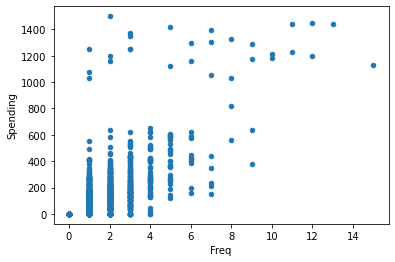

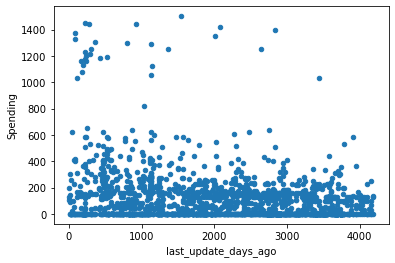

In [41]:

tayco.plot.scatter('Freq','Spending')
tayco.plot.scatter('last_update_days_ago','Spending' )



### c. 
i. 2000개 레코드를 학습 세트와 검증 세트로 나누시오  
ii. spending을 목적변수로 설정하고 6개 예측변수를 사용하여 다중 선형회귀모델을 만드시오. 추정된 회귀모델식을 구하시오.  
iii. 이 모델을 기반으로 하였을 때, 가장 많은 돈을 지출할 것 같은 구매고객의 유형은 무엇인가?  
iv. 예측변수들의 수를 줄이기 위해 후방소거법을 사용한다면, 어떠한 예측변수 먼저 탈락되겠는가?  
v. 검증 세트의 첫 번째 구매 데이터를 이용하여 예측값과 예측오차가 어떻게 계산되는지 보이시오.  
vi. 검증 세트에 대한 모델의 성능을 검토한 후 모델의 예측 정확도에 대해 평가하시오.  
vii. 모델의 잔차에 대한 히스토그램을 작성하시오. 정규분포를 따르는가? 이는 모델의 예측 성능에 어떠한 영향을 미치는가?

In [52]:
# i
x = tayco.drop(columns=['sequence_number','Spending'])
y = tayco['Spending']
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.4,random_state=1)

In [53]:
# ii
mod = LinearRegression()
mod.fit(train_x, train_y)

coef = pd.DataFrame({'x':x.columns, 'y':mod.coef_})
coef

,x,y
0,US,-4.204297
1,source_a,-2.301154
2,source_c,-42.727598
3,source_b,-17.094998
4,source_d,-46.966324
5,source_e,-24.909683
6,source_m,-19.357553
7,source_o,5.870741
8,source_h,-73.396889
9,source_r,-3.873796


In [56]:
# iii
# Purchase = 1 인 고객

In [58]:
# iv
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

allVariables = train_x.columns

best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)

# source_a 가 가장 먼저 소거된다.

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web order, Gender=male, Address_is_res, Purchase
Start: score=14858.09
Step: score=14856.10, remove source_a
Step: score=14854.12, remove source_r
Step: score=14852.20, remove Web order
Step: score=14850.27, remove source_s
Step: score=14848.35, remove source_u
Step: score=14846.54, remove US
Step: score=14844.79, remove source_o
Step: score=14843.17, remove source_m
Step: score=14841.89, remove source_w
Step: score=14840.76, remove source_b
Step: score=14839.84, remove source_x
Step: score=14839.24, remove Gender=male
Step: score=14839.24, remove None
['source_c', 'source_d', 'source_e', 'source_h', 'source_t', 'source_p', 'Freq', 'last_update_days_ago', '1st_update_days_ago', 'Address_is_res', 'Purchase']


In [60]:
# v
tayco_p = mod.predict(valid_x)
print(tayco_p[0], tayco_p[0]-valid_y[0])

-8.004318617794898 -136.0043186177949


In [64]:
# vi
regressionSummary(valid_y, tayco_p)
# 기준이 뭐지?


Regression statistics

               Mean Error (ME) : 4.2402
Root Mean Squared Error (RMSE) : 129.1919
     Mean Absolute Error (MAE) : 71.9990


array([[<AxesSubplot:title={'center':'Residuals'}>]], dtype=object)

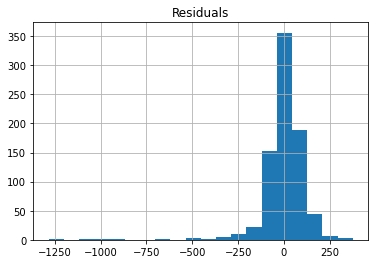

In [68]:
# vii
pd.DataFrame({'Residuals':tayco_p-valid_y}).hist(bins=20)
# 정규분포를 따르지 않는다.
# 예측성능은 정규분포가 아니어도 뛰어난 성능을 지닐 수 있다.

### 6.3

In [153]:
airfares = pd.read_csv('Airfares.csv')
airfares.head(2)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47


### a. 수치형 예측변수들과 반응변수인 운임(FARE)에 대한 상관관계 표를 만들고 운임과 예측변수들 사이의 산점도를 조사하시오. 어떤 예측변수가 최적의 예측변수인가?

In [91]:
cor = pd.DataFrame(airfares.corr().FARE)
cor = cor.drop(index=['FARE'])
cor

,FARE
COUPON,0.496537
NEW,0.091730
HI,0.025195
S_INCOME,0.209135
E_INCOME,0.326092
S_POP,0.145097
E_POP,0.285043
DISTANCE,0.670016
PAX,-0.090705


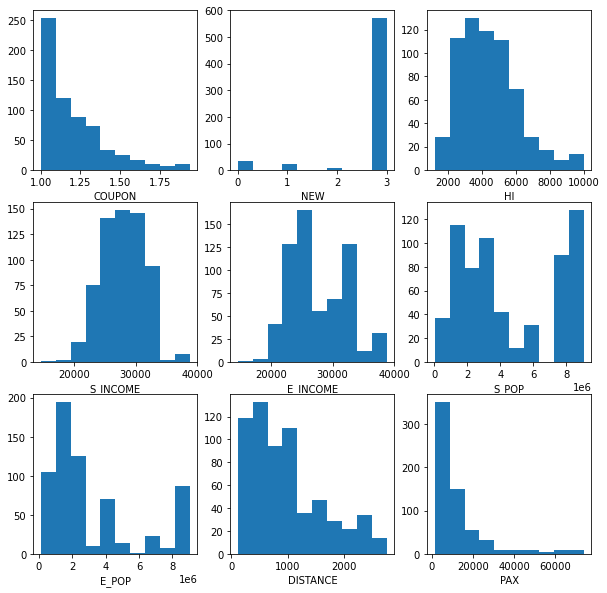

In [99]:
c1_name = [['COUPON','NEW','HI'],['S_INCOME','E_INCOME','S_POP'],
          ['E_POP','DISTANCE','PAX']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #행
    for j in range(3): #열
        ax[i][j].hist(airfares[c1_name[i][j]])
        ax[i][j].set_xlabel(c1_name[i][j])

fig.set_size_inches(10,10)
plt.show()

# COUPON 또는 PAX가 가장 큰 선형관계를 보이므로, 이 둘이 최적의 예측변수로 생각된다.

### b. 분류형 예측변수들(처음 네 개는 제외)에 대하여 각 범주별로 비행편의 백분율을 계산하여 조사하시오. 각 범주별 평균 운임을 보여주는 표를 작성하시오. 어떤 범주형 변수가 운임을 예측하는 데 가장 좋은 예측변수인가?

In [139]:
aircat = ['VACATION','SW','SLOT','GATE']
mean_df = pd.DataFrame()
for i in aircat:
    sum_gr = airfares.groupby(i).sum().FARE
    ratio_gr = sum_gr/sum(airfares['FARE'])*100
    print(ratio_gr)
    mean_gr = airfares.groupby(i).mean().FARE
    mean_df = pd.concat([mean_df, mean_gr], axis=0)
mean_df

VACATION
No     79.133971
Yes    20.866029
Name: FARE, dtype: float64
SW
No     81.404631
Yes    18.595369
Name: FARE, dtype: float64
SLOT
Controlled    32.992044
Free          67.007956
Name: FARE, dtype: float64
GATE
Constrained    23.332189
Free           76.667811
Name: FARE, dtype: float64


,0
No,173.552500
Yes,125.980882
No,188.182793
Yes,98.382268
Controlled,186.059396
Free,150.825680
Constrained,193.129032
Free,153.095953


### c

In [158]:
# i
airfares_ = airfares.iloc[:,4:18]
air_dm = pd.get_dummies(airfares_)
air_dm.head(3)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,1,0,0,1,0,1,0,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,1,0,1,0,0,1,0,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,1,0,1,0,0,1,0,1


In [172]:
x = air_dm.drop(columns=['FARE'])
y = air_dm['FARE']
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.4, random_state=1)
mod = LinearRegression()
mod.fit(train_x, train_y)
regressionSummary(valid_y, mod.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


In [173]:
# ii 
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

# 예측변수가 ['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'GATE_Constrained', 'SLOT_Controlled',
# 'PAX', 'E_POP', 'S_POP', 'E_INCOME'] 으로 이뤄진 회귀모델

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_No, VACATION_Yes, SW_No, SW_Yes, SLOT_Controlled, SLOT_Free, GATE_Constrained, GATE_Free
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_No
Step: score=3913.59, add VACATION_No
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Constrained
Step: score=3852.81, add SLOT_Controlled
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'GATE_Constrained', 'SLOT_Controlled', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


In [174]:
# iii 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)
results 

# 'n'=14 부터는 오히려 R_agj score가 떨어지기 시작한다. 따라서 n='13'을 모델로 택하는 것이 옳다.
# 즉, ['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE',
#     'PAX','VACATION_No','SW_No','SLOT_Controlled','GATE_Constrained']
# 단계적 회귀분석과 변수의 개수는 같지만 ,'GATE_Constrained' 대신에 'GATE_Free'가 선택된 것이 차이점이다.

[{'n': 1,
  'variables': ['DISTANCE'],
  'score': -0.45310713241704714,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['DISTANCE', 'SW_No'],
  'score': -0.6057151540067445,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['DISTANCE', 'VACATION_Yes', 'SW_Yes'],
  'score': -0.7069093753309805,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['HI', 'DISTANCE', 'VACATION_No', 'SW_Yes'],
  'score': -0.7249765894601139,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['HI',
   'DISTANCE',
   'VACATION_Yes',
   'SW_Yes',
   'GATE_Constrained'],
  'score': -0.7375839192847113,
  'model': LinearRegression()},
 {'n': 6,
  'variables': ['HI',
   'DISTANCE',
   'VACATION_Yes',
   'SW_No',
   'SLOT_Free',
   'GATE_Free'],
  'score': -0.7519469512913595,
  'model': LinearRegression()},
 {'n': 7,
  'variables': ['HI',
   'S_POP',
   'E_POP',
   'DISTANCE',
   'PAX',
   'VACATION_No',
   'SW_No'],
  'score': -0.7587466622504643,
  'model': LinearRegression()},
 {'

In [207]:
# iv
x_down = air_dm[['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'GATE_Constrained', 'SLOT_Controlled',
                   'PAX', 'E_POP', 'S_POP', 'E_INCOME']]
y_down = air_dm[['FARE']]
train_x, valid_x, train_y, valid_y = train_test_split(x_down, y_down, test_size=0.4, random_state=1)
mod_down = LinearRegression()
mod_down.fit(train_x, train_y)
regressionSummary(valid_y, mod_down.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -1.8591
       Root Mean Squared Error (RMSE) : 36.1129
            Mean Absolute Error (MAE) : 28.5252
          Mean Percentage Error (MPE) : -6.7084
Mean Absolute Percentage Error (MAPE) : 21.7198


In [243]:
x_all = air_dm[['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX','VACATION_No','SW_No','SLOT_Controlled','GATE_Constrained']]
train_x_, valid_x_, train_y_, valid_y_ = train_test_split(x_all, y_all, test_size=0.4, random_state=1)
mod_all = LinearRegression()
mod_all.fit(train_x_, train_y_)
regressionSummary(valid_y_, mod_all.predict(valid_x_))

# 둘이 거의 같은 정확도를 가지지만, 전역 탐색을 통한 모델이 좀 더 나은 정확도를 가진다.


Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


In [245]:
# v
v_x = pd.DataFrame({'COUPON':[1.202], 'NEW':[3], 'VACATION_No':[1], 'SW_No':[1], 
                    'HI':[4442.141],'S_INCOME':[28760], 'E_INCOME':[27644], 'S_POP':[4557004], 
                    'E_POP':[3195503],'SLOT_Free':[1],'GATE_Free':[1],'PAX':[12782],'DISTANCE':[1976]})
v_x
mod_all.predict(v_x) # 전역탐색 잘못됏음 ㅇㄴㅇㄴㅇㄴㅇㄴㅇㄴㅇㄴㅇㄴ

array([[566553.77660782]])

In [247]:
# vi
mod_all.predict(valid_x_).mean() - mod_all.predict(v_x) # 뭐래..

array([[-566391.20647239]])

In [ ]:
# vii
모르겟다

### 6.4

In [118]:
toyota_df=pd.read_csv('ToyotaCorolla.csv')

In [117]:
predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player',
              'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'

x = toyota_df[predictors]
y = toyota_df[outcome]

train_x, i_x, train_y, i_y = train_test_split(x, y, test_size = 0.5, random_state=1)
valid_x, test_x, valid_y, test_y = train_test_split(i_x, i_y, test_size = 0.2, random_state=1)

mod = LinearRegression()
mod.fit(train_x, train_y)

LinearRegression()

In [122]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar
Start: score=13870.51, constant
Step: score=12822.66, add Age_08_04
Step: score=12632.18, add Automatic_airco
Step: score=12543.91, add HP
Step: score=12499.68, add Quarterly_Tax
Step: score=12389.20, add KM
Step: score=12364.83, add Powered_Windows
Step: score=12351.63, add Sport_Model
Step: score=12335.00, add Guarantee_Period
Step: score=12323.80, add Doors
Step: score=12318.12, add Automatic
Step: score=12314.73, add Tow_Bar
Step: score=12313.28, add CD_Player
Step: score=12313.28, add None
['Age_08_04', 'Automatic_airco', 'HP', 'Quarterly_Tax', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Doors', 'Automatic', 'Tow_Bar', 'CD_Player']


### a
'Age_08_04', 'Automatic_airco', 'HP', 'Quarterly_Tax'

### b